In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import nltk


In [2]:
ruta = '../DATASETS/review_filtered.csv'

In [3]:
df_businnes = pd.read_csv('../DATASETS/business_corregido.csv')

In [4]:
df_review = pd.read_csv(ruta)
df_review

Unnamed: 0               review_id                 user_id  \
0               5  z0osLHDvXvzfm57D4DmD2Q  xVKE_HJ2pwUtTdLbL3pnCg   
1              24  tXHWJWnTdrraHGUqaPWj3g  zKAHSNzqvwsyoFCw3QpafA   
2              28  PPgbLBvi34A6m7bKJfTwhw  3TL6HZ1JrKcNTvGDWKlrow   
3              71  22n_UbOS_iqKKR3IrYhNGw  N1gb_Cx98QrcfA4CPrkY2w   
4              72  Is_4BTKGJTHxLGKRxLD_DQ  V8P2-U2IINNHzALqjaN3gQ   
...           ...                     ...                     ...   
22178      553268  t0UrDu825RGPsLuKXMT6bg  dYJPAlkQx_K7WVfbg3aj7A   
22179      553279  4w_AUydQp9lncMDY5FTRWg  eJnwyot0rLyWN84DwyC0RA   
22180      553300  -UFZX9OqpLGIGRuFXO9ISQ  -2p7YAwcCCeyfoCIsSrSow   
22181      553340  9rNq-bhaB5Wda1RYILFk7g  9X7nV5z6xPssvayASKJq7g   
22182      553437  d62egnRVBShVAXC-C4PyGw  oGbgMNotCOEDbCr371Pq4w   

                  business_id  stars  useful  \
0      S2Ho8yLxhKAa26pBAm6rxA      3       0   
1      S2Ho8yLxhKAa26pBAm6rxA      4       0   
2      GyC36Pn0Q1-qHnqXys6yFg      1       0   
3      QkyEr9j7il9lJqseTbPe5w      1       1   
4      GyC36Pn0Q1-qHnqXys6yFg      3       0   
...                       ...    ...     ...   
22178  lNsnmur2Df2oK9ywyY0H3g      3       6   
22179  vrQCClTDrPSbIHO-ub8qFg      4       6   
22180  vrQCClTDrPSbIHO-ub8qFg      3       5   
22181  NQ01WqVX0tojNHKn-0sFww      4       1   
22182  xh7mQ46QUMswpugKJFmppQ      5       0   

                                                    text                 date  
0      Service was crappy, and food was mediocre.  I ...  2016-11-22 00:22:53  
1      Enjoyed my fish out at a sidewalk table.  A bi...  2018-05-19 01:14:05  
2      Service and management terrible... After messi...  2013-12-07 13:17:13  
3      I went here when if first opened, and have nev...  2013-05-29 02:17:04  
4      It's my first time here and the service is slo...  2016-01-30 05:24:09  
...                                                  ...                  ...  
22178  I've been here several times before for dinner...  2015-04-12 14:32:07  
22179  I have been eating at Sardi's for awhile,  pre...  2018-05-07 20:08:20  
22180  From the outside, this place doesn't look like...  2020-01-06 03:01:15  
22181  Have been to Tir Na Nog for several late night...  2018-03-29 14:34:58  
22182  Wow. Oh. Wow. This place really hit the spot. ...  2022-01-08 23:02:33  

[22183 rows x 8 columns]

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Procesamiento del texto

In [6]:
# Convertir texto a minúsculas
df_review["text"] = df_review["text"].str.lower()

# Eliminar puntuación y símbolos innecesarios
df_review["text"] = df_review["text"].str.replace("[^\w\s]", "")

# Eliminar stopwords 
from nltk.corpus import stopwords  
stop_words = stopwords.words('english')
df_review["text"] = df_review["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lematización 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_review["text"] = df_review["text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
df_review["sentiment"] = df_review["text"].apply(analyzer.polarity_scores)

# Access sentiment scores directly (assuming order is consistent)
df_review["compound"] = df_review["sentiment"].tolist()[0]["compound"]
df_review["pos"] = df_review["sentiment"].tolist()[0]["pos"]
df_review["neg"] = df_review["sentiment"].tolist()[0]["neg"]
df_review["neu"] = df_review["sentiment"].tolist()[0]["neu"]


In [9]:
df_review

Unnamed: 0               review_id                 user_id  \
0               5  z0osLHDvXvzfm57D4DmD2Q  xVKE_HJ2pwUtTdLbL3pnCg   
1              24  tXHWJWnTdrraHGUqaPWj3g  zKAHSNzqvwsyoFCw3QpafA   
2              28  PPgbLBvi34A6m7bKJfTwhw  3TL6HZ1JrKcNTvGDWKlrow   
3              71  22n_UbOS_iqKKR3IrYhNGw  N1gb_Cx98QrcfA4CPrkY2w   
4              72  Is_4BTKGJTHxLGKRxLD_DQ  V8P2-U2IINNHzALqjaN3gQ   
...           ...                     ...                     ...   
22178      553268  t0UrDu825RGPsLuKXMT6bg  dYJPAlkQx_K7WVfbg3aj7A   
22179      553279  4w_AUydQp9lncMDY5FTRWg  eJnwyot0rLyWN84DwyC0RA   
22180      553300  -UFZX9OqpLGIGRuFXO9ISQ  -2p7YAwcCCeyfoCIsSrSow   
22181      553340  9rNq-bhaB5Wda1RYILFk7g  9X7nV5z6xPssvayASKJq7g   
22182      553437  d62egnRVBShVAXC-C4PyGw  oGbgMNotCOEDbCr371Pq4w   

                  business_id  stars  useful  \
0      S2Ho8yLxhKAa26pBAm6rxA      3       0   
1      S2Ho8yLxhKAa26pBAm6rxA      4       0   
2      GyC36Pn0Q1-qHnqXys6yFg      1       0   
3      QkyEr9j7il9lJqseTbPe5w      1       1   
4      GyC36Pn0Q1-qHnqXys6yFg      3       0   
...                       ...    ...     ...   
22178  lNsnmur2Df2oK9ywyY0H3g      3       6   
22179  vrQCClTDrPSbIHO-ub8qFg      4       6   
22180  vrQCClTDrPSbIHO-ub8qFg      3       5   
22181  NQ01WqVX0tojNHKn-0sFww      4       1   
22182  xh7mQ46QUMswpugKJFmppQ      5       0   

                                                    text                 date  \
0      service crappy, food mediocre. wish would pick...  2016-11-22 00:22:53   
1      enjoyed fish sidewalk table. bit pricey food g...  2018-05-19 01:14:05   
2      service management terrible... messing 4 order...  2013-12-07 13:17:13   
3      went first opened, never desired go back again...  2013-05-29 02:17:04   
4      first time service slow. employee good attitud...  2016-01-30 05:24:09   
...                                                  ...                  ...   
22178  i've several time dinner, recently negative ex...  2015-04-12 14:32:07   
22179  eating sardi's awhile, pretty much since opene...  2018-05-07 20:08:20   
22180  outside, place look like big deal. man chicken...  2020-01-06 03:01:15   
22181  tir na nog several late night also nfl playoff...  2018-03-29 14:34:58   
22182  wow. oh. wow. place really hit spot. looking e...  2022-01-08 23:02:33   

                                               sentiment  compound    pos  \
0      {'neg': 0.235, 'neu': 0.588, 'pos': 0.176, 'co...   -0.2263  0.176   
1      {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...   -0.2263  0.176   
2      {'neg': 0.312, 'neu': 0.605, 'pos': 0.083, 'co...   -0.2263  0.176   
3      {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2263  0.176   
4      {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'comp...   -0.2263  0.176   
...                                                  ...       ...    ...   
22178  {'neg': 0.07, 'neu': 0.722, 'pos': 0.208, 'com...   -0.2263  0.176   
22179  {'neg': 0.064, 'neu': 0.751, 'pos': 0.185, 'co...   -0.2263  0.176   
22180  {'neg': 0.046, 'neu': 0.726, 'pos': 0.228, 'co...   -0.2263  0.176   
22181  {'neg': 0.016, 'neu': 0.668, 'pos': 0.316, 'co...   -0.2263  0.176   
22182  {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...   -0.2263  0.176   

         neg    neu  
0      0.235  0.588  
1      0.235  0.588  
2      0.235  0.588  
3      0.235  0.588  
4      0.235  0.588  
...      ...    ...  
22178  0.235  0.588  
22179  0.235  0.588  
22180  0.235  0.588  
22181  0.235  0.588  
22182  0.235  0.588  

[22183 rows x 13 columns]

### Cálculo del KPI

In [10]:
# Pondera la puntuación con el número de votos útiles (opcional)
df_review["weighted_sentiment"] = df_review["compound"] * df_review["useful"]

In [23]:
kpi_sentimiento = (df_review["weighted_sentiment"].mean() * 0.7) + (df_review["pos"].mean() * 0.3)
kpi_sentimiento

-0.10221799936888606

In [21]:
df_review

Unnamed: 0               review_id                 user_id  \
0               5  z0osLHDvXvzfm57D4DmD2Q  xVKE_HJ2pwUtTdLbL3pnCg   
1              24  tXHWJWnTdrraHGUqaPWj3g  zKAHSNzqvwsyoFCw3QpafA   
2              28  PPgbLBvi34A6m7bKJfTwhw  3TL6HZ1JrKcNTvGDWKlrow   
3              71  22n_UbOS_iqKKR3IrYhNGw  N1gb_Cx98QrcfA4CPrkY2w   
4              72  Is_4BTKGJTHxLGKRxLD_DQ  V8P2-U2IINNHzALqjaN3gQ   
...           ...                     ...                     ...   
22178      553268  t0UrDu825RGPsLuKXMT6bg  dYJPAlkQx_K7WVfbg3aj7A   
22179      553279  4w_AUydQp9lncMDY5FTRWg  eJnwyot0rLyWN84DwyC0RA   
22180      553300  -UFZX9OqpLGIGRuFXO9ISQ  -2p7YAwcCCeyfoCIsSrSow   
22181      553340  9rNq-bhaB5Wda1RYILFk7g  9X7nV5z6xPssvayASKJq7g   
22182      553437  d62egnRVBShVAXC-C4PyGw  oGbgMNotCOEDbCr371Pq4w   

                  business_id  stars  useful  \
0      S2Ho8yLxhKAa26pBAm6rxA      3       0   
1      S2Ho8yLxhKAa26pBAm6rxA      4       0   
2      GyC36Pn0Q1-qHnqXys6yFg      1       0   
3      QkyEr9j7il9lJqseTbPe5w      1       1   
4      GyC36Pn0Q1-qHnqXys6yFg      3       0   
...                       ...    ...     ...   
22178  lNsnmur2Df2oK9ywyY0H3g      3       6   
22179  vrQCClTDrPSbIHO-ub8qFg      4       6   
22180  vrQCClTDrPSbIHO-ub8qFg      3       5   
22181  NQ01WqVX0tojNHKn-0sFww      4       1   
22182  xh7mQ46QUMswpugKJFmppQ      5       0   

                                                    text                 date  \
0      service crappy, food mediocre. wish would pick...  2016-11-22 00:22:53   
1      enjoyed fish sidewalk table. bit pricey food g...  2018-05-19 01:14:05   
2      service management terrible... messing 4 order...  2013-12-07 13:17:13   
3      went first opened, never desired go back again...  2013-05-29 02:17:04   
4      first time service slow. employee good attitud...  2016-01-30 05:24:09   
...                                                  ...                  ...   
22178  i've several time dinner, recently negative ex...  2015-04-12 14:32:07   
22179  eating sardi's awhile, pretty much since opene...  2018-05-07 20:08:20   
22180  outside, place look like big deal. man chicken...  2020-01-06 03:01:15   
22181  tir na nog several late night also nfl playoff...  2018-03-29 14:34:58   
22182  wow. oh. wow. place really hit spot. looking e...  2022-01-08 23:02:33   

                                               sentiment  compound    pos  \
0      {'neg': 0.235, 'neu': 0.588, 'pos': 0.176, 'co...   -0.2263  0.176   
1      {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...   -0.2263  0.176   
2      {'neg': 0.312, 'neu': 0.605, 'pos': 0.083, 'co...   -0.2263  0.176   
3      {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2263  0.176   
4      {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'comp...   -0.2263  0.176   
...                                                  ...       ...    ...   
22178  {'neg': 0.07, 'neu': 0.722, 'pos': 0.208, 'com...   -0.2263  0.176   
22179  {'neg': 0.064, 'neu': 0.751, 'pos': 0.185, 'co...   -0.2263  0.176   
22180  {'neg': 0.046, 'neu': 0.726, 'pos': 0.228, 'co...   -0.2263  0.176   
22181  {'neg': 0.016, 'neu': 0.668, 'pos': 0.316, 'co...   -0.2263  0.176   
22182  {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...   -0.2263  0.176   

         neg    neu  weighted_sentiment  
0      0.235  0.588             -0.0000  
1      0.235  0.588             -0.0000  
2      0.235  0.588             -0.0000  
3      0.235  0.588             -0.2263  
4      0.235  0.588             -0.0000  
...      ...    ...                 ...  
22178  0.235  0.588             -1.3578  
22179  0.235  0.588             -1.3578  
22180  0.235  0.588             -1.1315  
22181  0.235  0.588             -0.2263  
22182  0.235  0.588             -0.0000  

[22183 rows x 14 columns]

In [22]:
df_review.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'text', 'date', 'sentiment', 'compound', 'pos', 'neg', 'neu',
       'weighted_sentiment'],
      dtype='object')

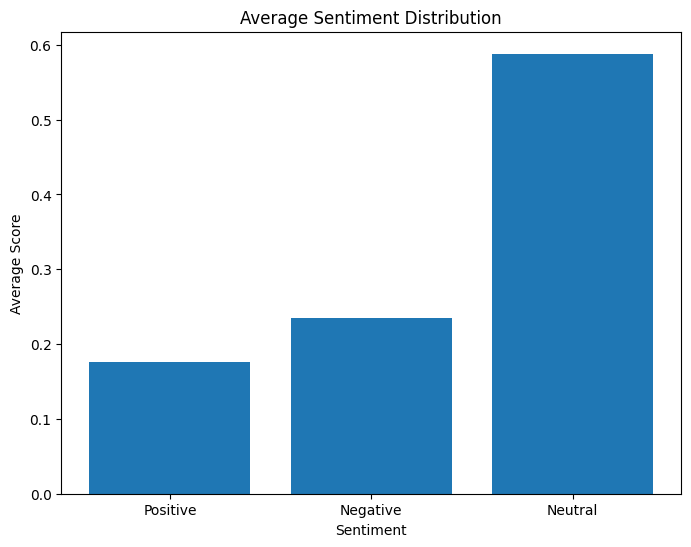

In [12]:
# Diagrama de barras para emociones positivas, negativas y neutras
plt.figure(figsize=(8, 6))
plt.bar(["Positive", "Negative", "Neutral"], [df_review["pos"].mean(), df_review["neg"].mean(), df_review["neu"].mean()])
plt.xlabel("Sentiment")
plt.ylabel("Average Score")
plt.title("Average Sentiment Distribution")
plt.show()

In [13]:
print("KPI Compuesto:", kpi_sentimiento)

KPI Compuesto: -0.10221799936888606


Concatenamos

In [14]:
df_businnes = df_businnes[["business_id","name", "city", "state", "review_count", "categories"]]

In [15]:
df_comb = pd.merge(df_review, df_businnes, how="inner", on="business_id")

In [16]:
# Sort DataFrame by review_count (descending order - Top 10)
top_10_businesses = df_comb.sort_values(by='review_count', ascending=False).head(10)

# Add additional columns (assuming they exist in your dataset)
top_10_businesses = top_10_businesses[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'text', 
                                       'date', 'name', 'city', 'state', 'categories']]

# Sentiment Analysis (if not already done)
if 'sentiment' not in top_10_businesses.columns:
    analyzer = SentimentIntensityAnalyzer()
    top_10_businesses['sentiment'] = top_10_businesses["text"].apply(analyzer.polarity_scores)
    top_10_businesses["compound"] = top_10_businesses["sentiment"].tolist()[0]["compound"]
    top_10_businesses["pos"] = top_10_businesses["sentiment"].tolist()[0]["pos"]
    top_10_businesses["neg"] = top_10_businesses["sentiment"].tolist()[0]["neg"]
    top_10_businesses["neu"] = top_10_businesses["sentiment"].tolist()[0]["neu"]

# Print the results (consider using to_csv() to save as a file)
print(top_10_businesses.to_string())


                   review_id                 user_id             business_id  stars  useful                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text                 date                                  name       city state                                              categories                                                        sentiment  comp

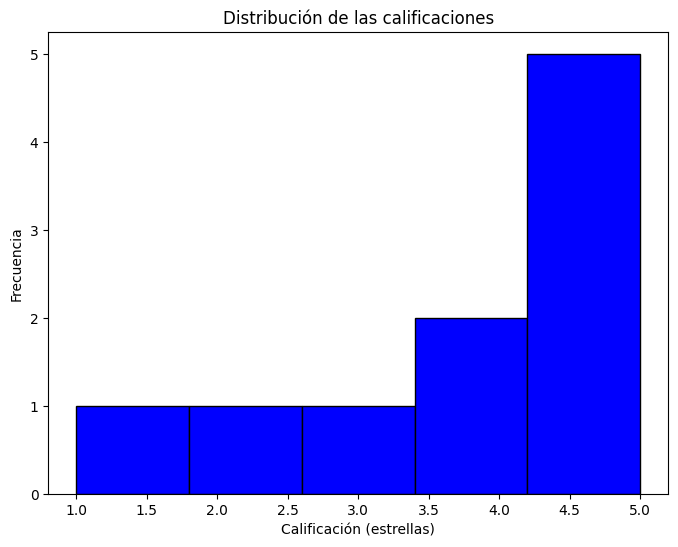

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(top_10_businesses['stars'], bins=5, color='b', edgecolor='k')
plt.xlabel('Calificación (estrellas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las calificaciones')
plt.show()


In [18]:
df_comb.to_csv('analisis de sentimiento.csv')

In [19]:
df_comb.to_csv('kpi_analisis_sentiment.csv')